In [1]:
'''
    Importing Modules
'''
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
'''
    Loading Training and Test Data
'''
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
'''
    We can't give NN a list of integers. So we create the following function to convert
    to tensors of shape (rows, 10000). We also simultaneously perform one-hot encoding.
'''
def vectorize_sequences(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1
    return (results)       
    

In [5]:
'''
    Applying the function to test and train data
'''
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
'''
    Vectorize the labels
'''
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [8]:
'''
    Network Architecture
'''
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))



In [9]:
'''
    Specify loss function and optimizer
'''
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [10]:
'''
    Split train into validation and train
'''
x_val = x_train[0:10000]
x_partial_train = x_train[10000:]
y_val = y_train[0:10000]
y_partial_train = y_train[10000:]


In [11]:
'''
    Fit the data
'''
history = model.fit(x_partial_train, y_partial_train, epochs = 20, batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.5093 - acc: 0.7958 - val_loss: 0.3878 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3053 - acc: 0.9057 - val_loss: 0.3205 - val_acc: 0.8762
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2234 - acc: 0.9307 - val_loss: 0.2778 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1785 - acc: 0.9418 - val_loss: 0.2732 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1446 - acc: 0.9548 - val_loss: 0.2854 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1216 - acc: 0.9633 - val_loss: 0.2910 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.0989 - acc: 0.9716 - val_loss: 0.3038 - 

In [12]:
'''
    Looking at the result
'''
history_dict = history.history
history_dict.keys()
    

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5, 1.0, 'Loss Vs Epoch for Training and Validation')

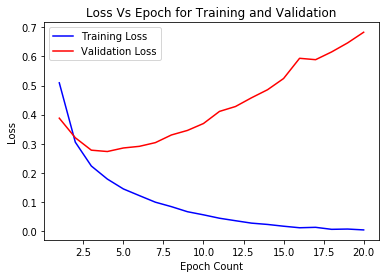

In [13]:
'''
    Plotting training and validation loss by epoch
'''
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = np.arange(1, 21)
plt.plot(epoch, train_loss, 'b', label = 'Training Loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation Loss')
plt.xlabel('Epoch Count')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Vs Epoch for Training and Validation')

Text(0.5, 1.0, 'Accuaracy Vs Epoch for Training and Validation')

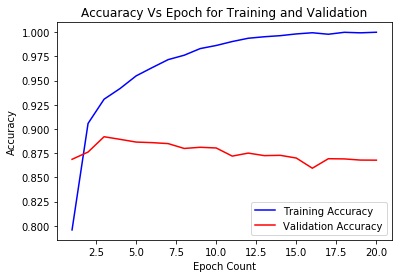

In [14]:
'''
    Plotting training and validation accuracy by epoch
'''
train_acc= history_dict['acc']
val_acc = history_dict['val_acc']

epoch = np.arange(1, 21)
plt.plot(epoch, train_acc, 'b', label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'r', label = 'Validation Accuracy')
plt.xlabel('Epoch Count')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuaracy Vs Epoch for Training and Validation')

In [15]:
'''
    We will set number of epochs to be about 4 and retrain the model and predict on test data
'''
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2245 - acc: 0.9468
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.1295 - acc: 0.9611
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0985 - acc: 0.9703
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0756 - acc: 0.9774


In [16]:
'''
    We achieve an accuracy of roughly 85%. Not bad 
'''
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 4s 177us/step


[0.4848432689666748, 0.860480010509491]